<a href="https://www.kaggle.com/code/stivenlancheros/credit-card-fraud-detection?scriptVersionId=123728817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Description
# Prediction of Credit Card fraud:

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. 

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.


# Reading the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df= pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# EDA

In [2]:
#Data is preprocessed. Most columns have been processed using PCA, except for Time, Amount and Class.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Data ranges differ greatly amongst all features. Normalization should be done.
- Mean and median are similar in most of the features which shows symmetrical distribution.
- Info shows no null data and same data type across all features except Class.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.Class.unique()

array([0, 1])

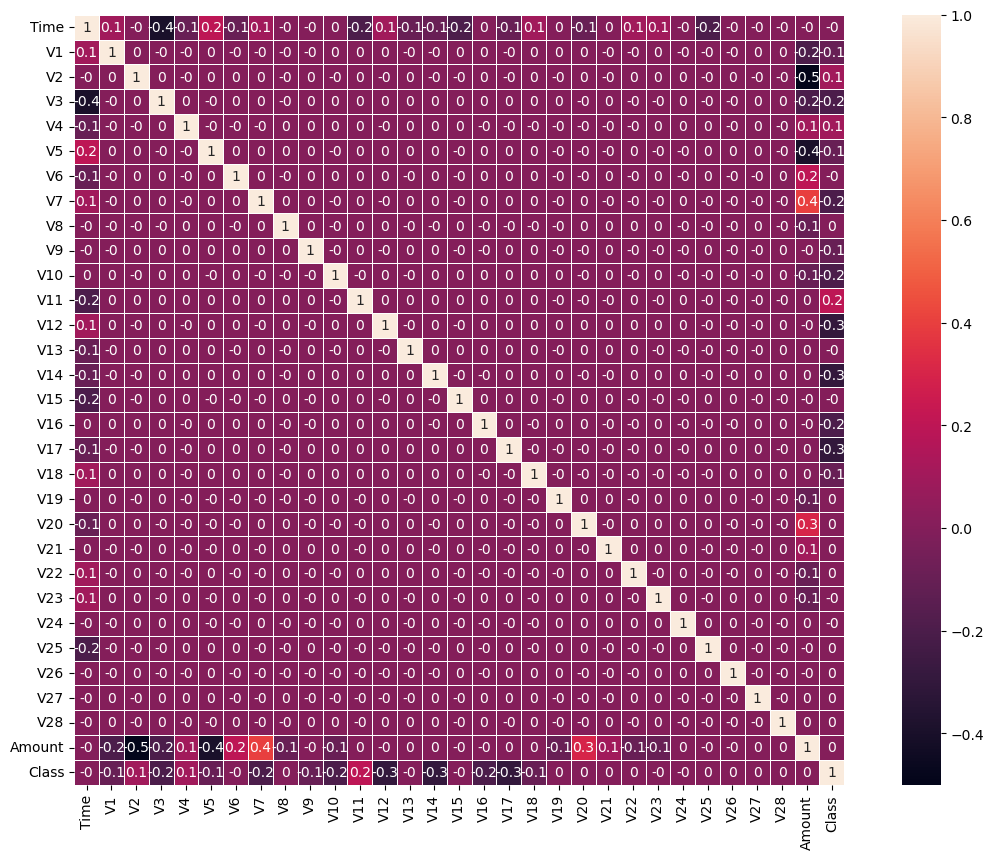

In [5]:
plt.figure(figsize=(15,10))
corr_matrix= df.corr().round(1)
sns.heatmap(data= corr_matrix, annot=True, linewidths=0.5, square=True)
plt.show()

In [6]:
#Empty values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- Boxplot for all the variable to identify ranges and outliers

In [7]:
col_dic= {}
for k,v in enumerate(df.columns):
  col_dic[v]= k+1

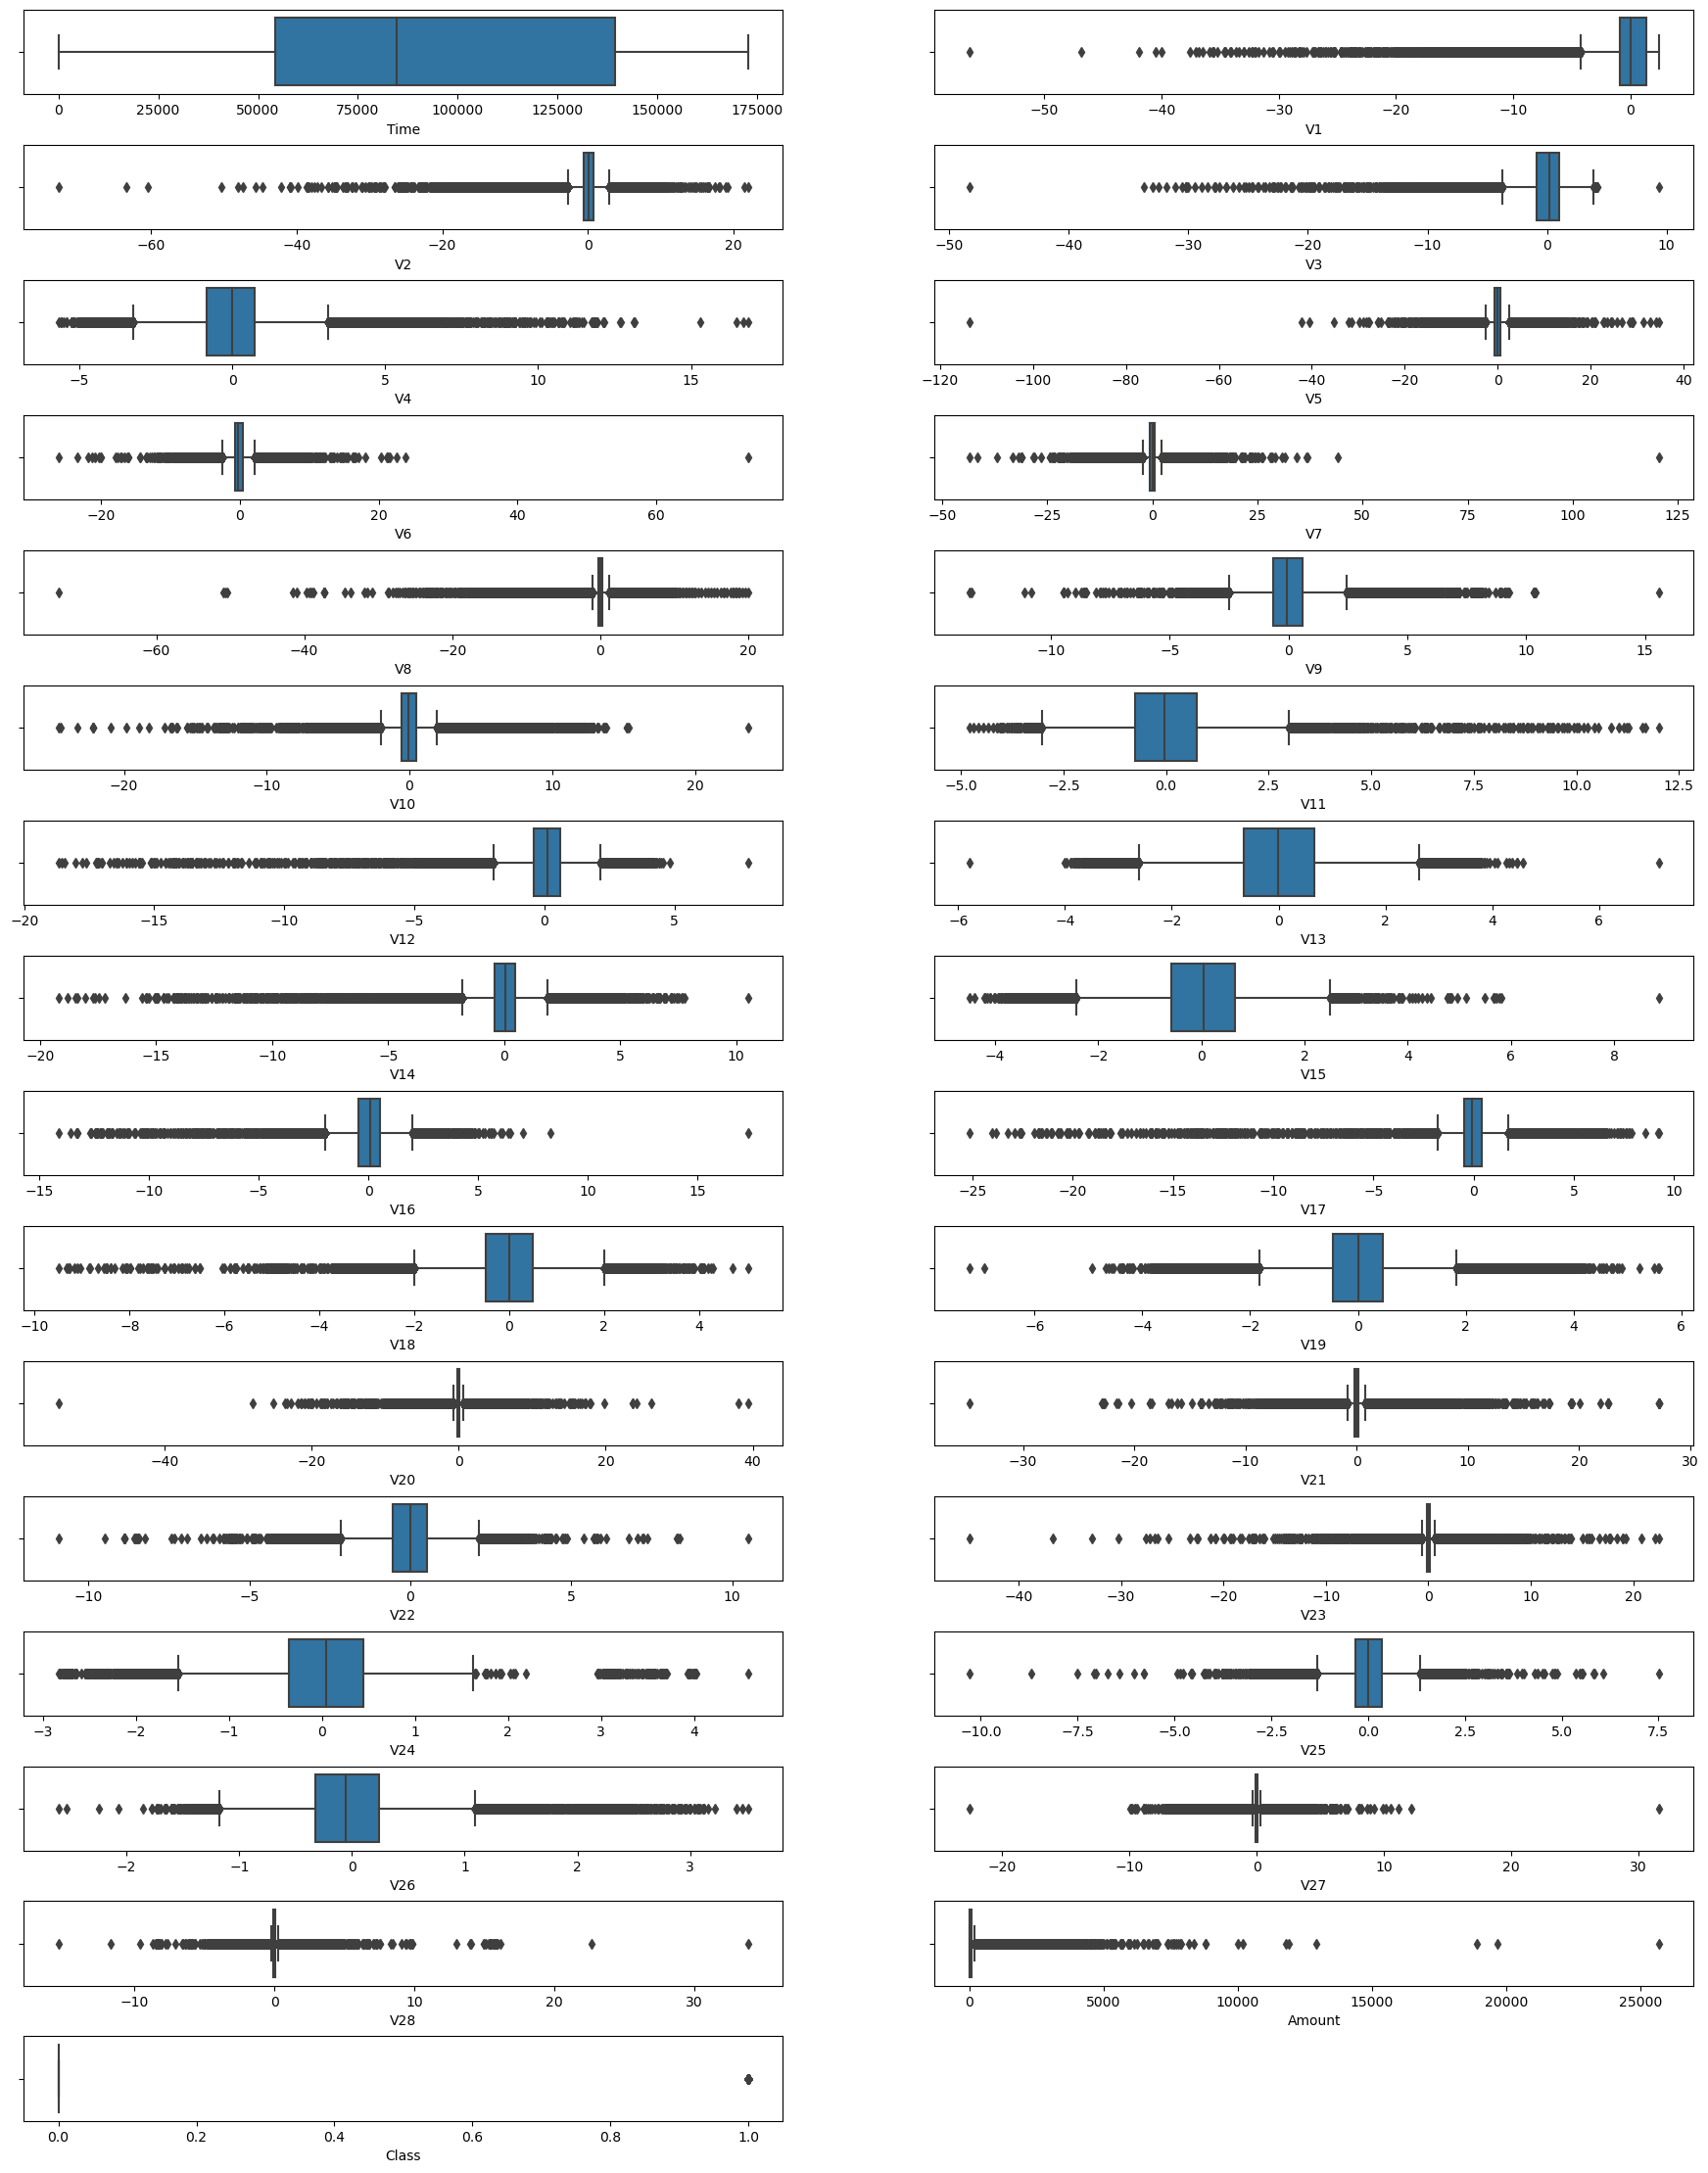

In [8]:
plt.figure(figsize=(22,28))

for variable, i in col_dic.items():
  plt.subplot(16,2,i, axisbelow= True)
  sns.boxplot(x= df[variable])
# set the spacing between subplots
plt.subplots_adjust(hspace=0.6)
plt.show()


Takeaways:
- All variables contain high amount of outliers
- All variables have a median close to 0
- Distribution on all the variables appear to be normal with small variations in V1(Positive skewed) and V3 (negative skewed)
- All columns have different ranges, comparison is better after normalization to determine dispersion

#Checking Distribution

In [9]:
def centers(data):
  mean,median, modes= data.mean(), data.median(), data.mode()
  mn= plt.axvline(mean, color="red")
  md= plt.axvline(median, color="green")   
  for mode in modes:
    mo= plt.axvline(mean, color="yellow")
  plt.legend((mn,md,mo), "Mean Median Mode".split())

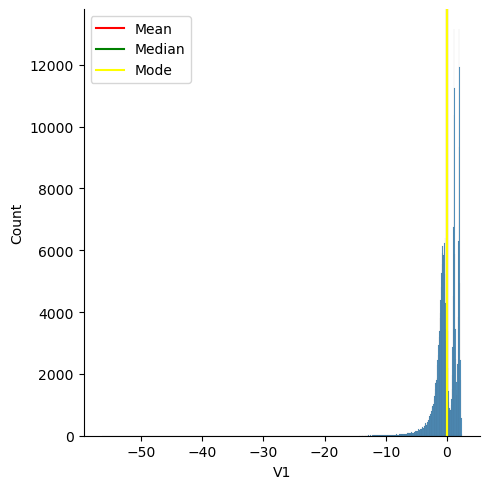

In [10]:
sns.displot(df.V1)
centers(df.V1)

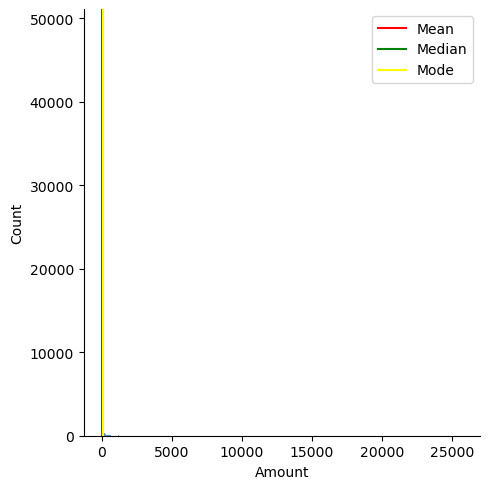

In [11]:
sns.displot(df.Amount)
centers(df.Amount)

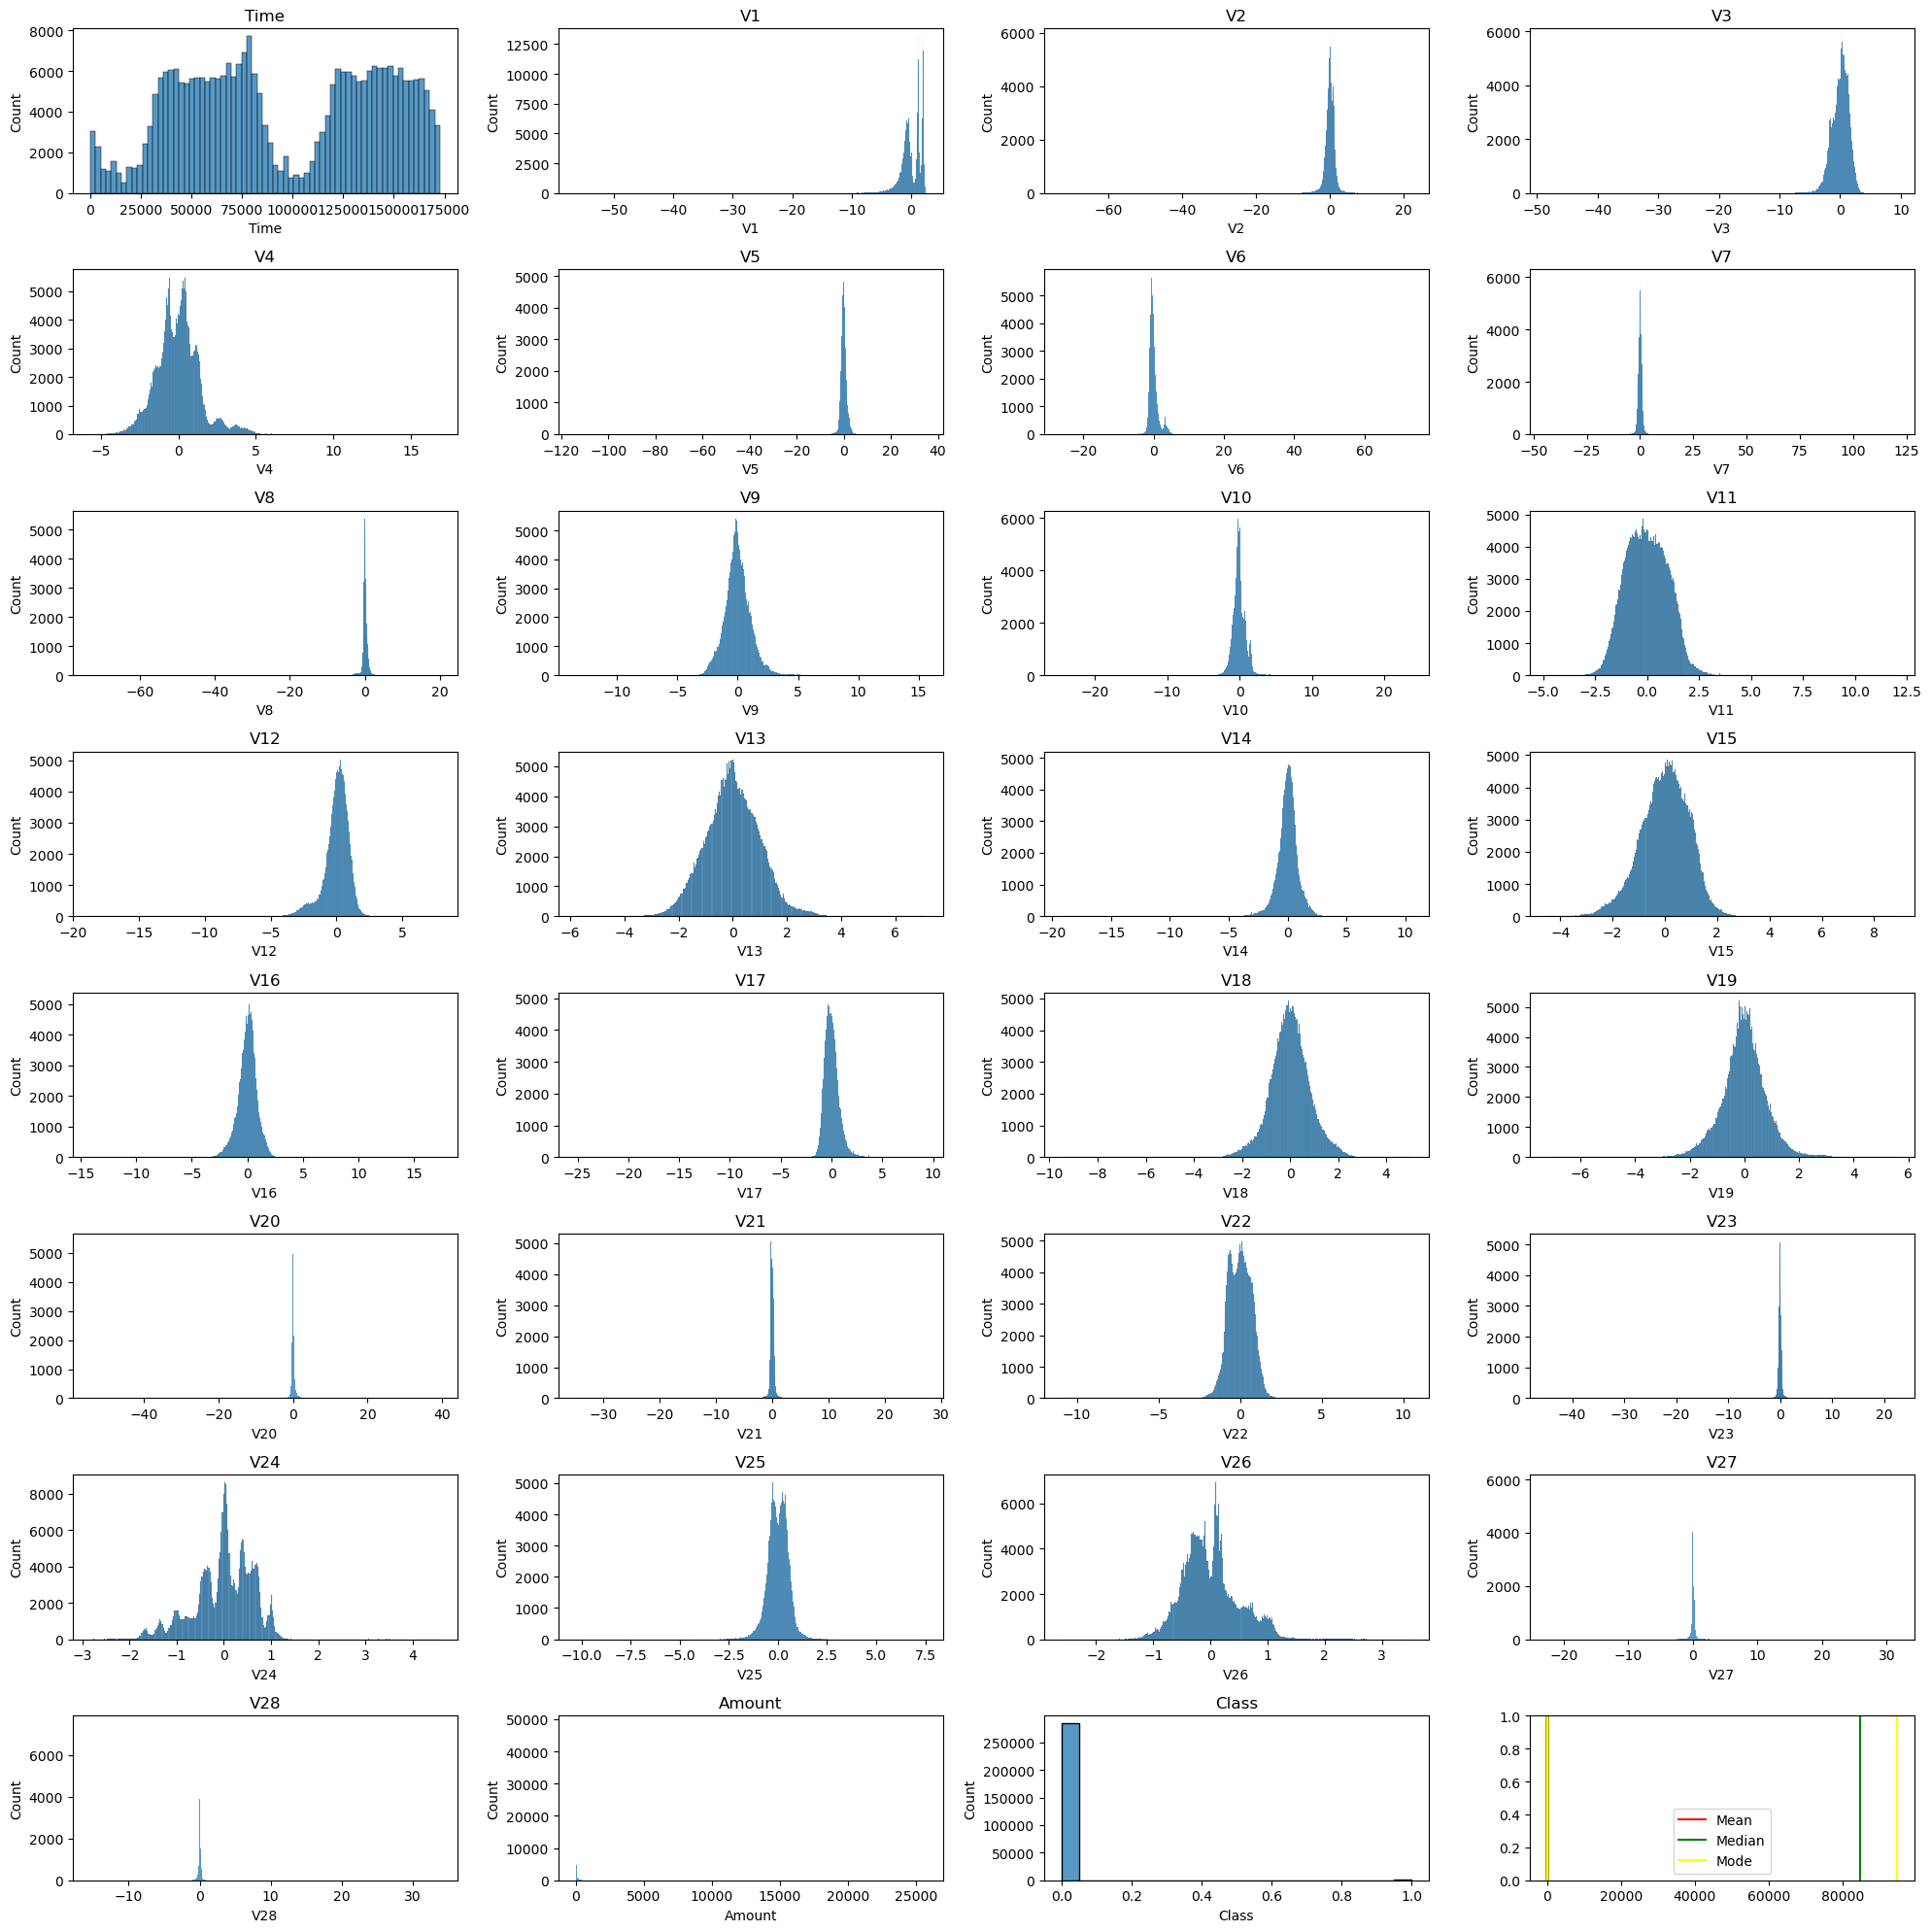

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with multiple plots
fig, axs = plt.subplots(8, 4, figsize=(20, 20))
axs = axs.ravel()

# Plot histograms for all columns
for i, column in enumerate(df.columns):
    sns.histplot(df[column], ax=axs[i])
    centers(df[column])
    axs[i].set_title(column)

plt.tight_layout()
plt.show()

# Check class balance:

In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

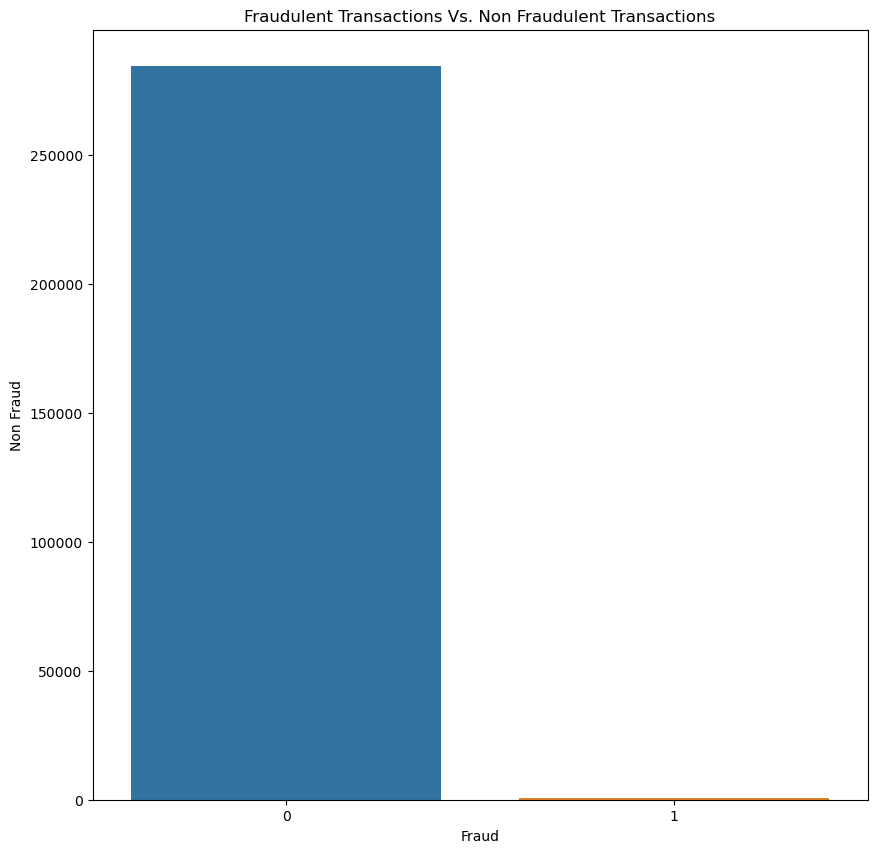

In [14]:
#Imbalanced Dataset: 0 non.fraudulent and 1 fraudulent
#The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

plt.figure(figsize=(10,10))
sns.countplot(x= "Class", data= df)
plt.title ("Fraudulent Transactions Vs. Non Fraudulent Transactions")
plt.xlabel ("Fraud")
plt.ylabel ("Non Fraud")
plt.show()

#Check and process Outliers
-Outliers influence the best fit line. Check the amount of outliers and depending on percentage either transform them, drop them or leave them.


In [15]:
import numpy as np
#Tukey Method:
for variable in col_dic.keys():
  #q75,q25=np.percentile(df[variable], [75,25])
  q25 = df[variable].quantile(0.25)
  q75 = df[variable].quantile(0.75)
  iqr=q75-q25
  min_threshold= q25-(iqr*1.5)
  max_threshold= q75+(iqr*1.5)
  outliers = df[(df[variable] < min_threshold) | (df[variable] > max_threshold)]
  num_outliers = outliers.shape[0]
  percentage= num_outliers/284807*100
  print("Number of outliers and percentage of it in {}: {} and {:0.2f}% \n".format(variable, num_outliers, percentage))
  

Number of outliers and percentage of it in Time: 0 and 0.00% 

Number of outliers and percentage of it in V1: 7062 and 2.48% 

Number of outliers and percentage of it in V2: 13526 and 4.75% 

Number of outliers and percentage of it in V3: 3363 and 1.18% 

Number of outliers and percentage of it in V4: 11148 and 3.91% 

Number of outliers and percentage of it in V5: 12295 and 4.32% 

Number of outliers and percentage of it in V6: 22965 and 8.06% 

Number of outliers and percentage of it in V7: 8948 and 3.14% 

Number of outliers and percentage of it in V8: 24134 and 8.47% 

Number of outliers and percentage of it in V9: 8283 and 2.91% 

Number of outliers and percentage of it in V10: 9496 and 3.33% 

Number of outliers and percentage of it in V11: 780 and 0.27% 

Number of outliers and percentage of it in V12: 15348 and 5.39% 

Number of outliers and percentage of it in V13: 3368 and 1.18% 

Number of outliers and percentage of it in V14: 14149 and 4.97% 

Number of outliers and percent

In [16]:
import pandas as pd
import numpy as np

def replace_outliers(df, col_name, k=1.5):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k*iqr
    upper_bound = q3 + k*iqr
    
    df[col_name] = np.where(df[col_name] < lower_bound, lower_bound, df[col_name])
    df[col_name] = np.where(df[col_name] > upper_bound, upper_bound, df[col_name])
      
    return df

In [17]:
for i in col_dic.keys():
  if i != "Class":
    replace_outliers(df, i, k=1.5)

In [18]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.6200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.6900,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,184.5125,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.5000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.9900,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-4.274396,2.907135,-3.766705,-2.066656,-2.646882,-2.518586,-2.240844,1.131309,1.914428,...,0.213454,0.111864,0.611875,-0.509348,1.352506,0.250034,0.333872,0.275140,0.7700,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.7900,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.567212,2.148856,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.8800,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0000,0


<AxesSubplot:>

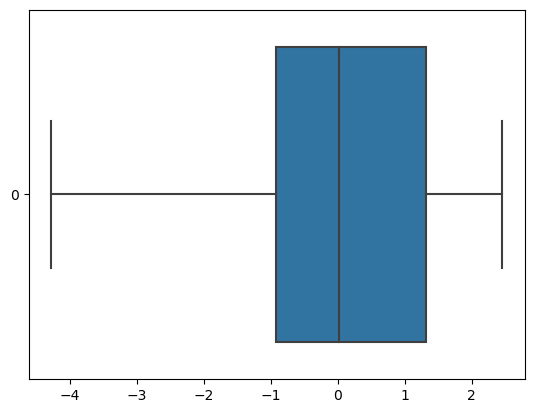

In [19]:
#Before Replacing outliers
sns.boxplot(df["V1"],orient="horizontal")

<AxesSubplot:xlabel='V1'>

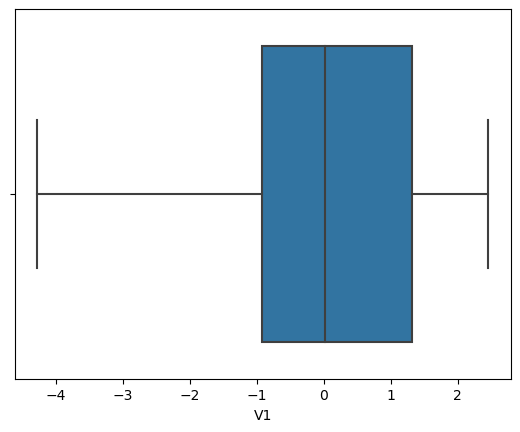

In [20]:
#After replacing outliers
sns.boxplot(x=df["V1"])

In [21]:
df.info() #Check null values again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#Scaler
- Dataset (V1...) were previously processed using PCA, therefore I apply StandardScaler to the remaining features (Time and Amount)



In [22]:
from sklearn.preprocessing import StandardScaler


# Scale 'Time' and 'Amount'
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

In [23]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.587299,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.795094,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,2.153063,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.163777,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.296140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-4.274396,2.907135,-3.766705,-2.066656,-2.646882,-2.518586,-2.240844,1.131309,1.914428,...,0.213454,0.111864,0.611875,-0.509348,1.352506,0.250034,0.333872,0.275140,-0.826226,0
284803,1.641952,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.436754,0
284804,1.641974,1.919565,-0.301254,-3.249640,-0.557828,2.567212,2.148856,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.261928,0
284805,1.641974,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.676566,0


In [24]:
df.isnull().sum().sum()

0

Dealing with NaNs

In [25]:
df = df.fillna(df.mean())
df.isnull().sum().sum()

0

Up to this point, the dataset has been analysed, processed by dealing with outliers and standarizing the data. Next, I will create datasets using undersampling and oversampling to test with different ML or DL models.

#Dealing with imbalanced dataset:
- I test three datasets:
  1. Undersampling the majority class
  2. Oversampling the minority class
  3. SMOTE
I use the imblearn library

In [26]:
!pip install imblearn

ERROR: Could not find a version that satisfies the requirement imblearn (from versions: none)
ERROR: No matching distribution found for imblearn


In [27]:
X= df.drop(["Class"], axis=1)
y= df.Class

In [28]:
fraud= len(df[df["Class"]==1])
no_fraud= len(df[df["Class"]==0])

In [29]:
print(f"Fraudulent transactions: {fraud}")
print(f"Non Fraudulent transactions: {no_fraud}")

Fraudulent transactions: 492
Non Fraudulent transactions: 284315


##Undersampling
Testing two techniques:
- Edited NearestNeighbours and RandomOverSampler

In [30]:
from imblearn.under_sampling import CondensedNearestNeighbour,EditedNearestNeighbours,NearMiss,NeighbourhoodCleaningRule,OneSidedSelection,RandomUnderSampler,TomekLinks

RandomUnderSampler

In [31]:
rus = RandomUnderSampler(random_state=0, replacement=True)
X_random_undersampled, y_random_undersampled = rus.fit_resample(X, y)
X_random_undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.417512,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,-0.062126,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,-0.822496
1,0.055069,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.457494,...,-0.204003,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,-0.596304
2,-0.381377,1.212061,-0.366070,1.059187,-0.035950,-1.002583,0.047175,-0.811711,0.213515,0.856225,...,-0.057860,-0.092749,-0.091206,0.014558,0.091391,0.128617,0.993584,-0.036948,0.001613,-0.822496
3,-0.706575,-1.051204,1.075649,0.895192,1.175461,0.109368,0.474795,0.128613,0.676522,-0.574833,...,-0.035441,0.030416,0.305363,0.039111,-0.296289,-0.028537,-0.221573,0.198834,0.099191,-0.529177
4,0.922803,-4.274396,-2.701961,-1.503282,-1.876924,-2.148060,-0.946421,1.117545,0.099251,0.136878,...,-0.710401,-0.624943,-1.553608,-0.626079,0.158920,-1.009544,-0.862611,0.217553,-0.249819,2.153063


In [32]:
print(len(X_random_undersampled))
print(len(y_random_undersampled))

984
984


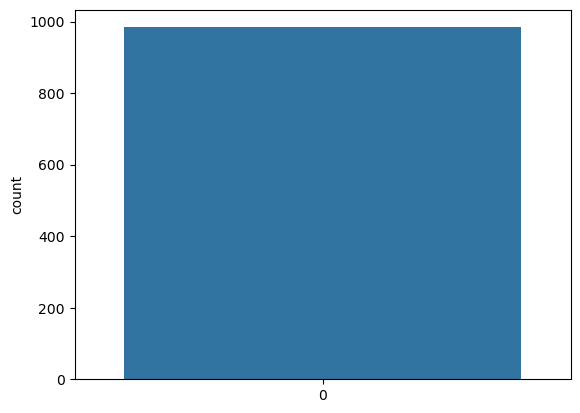

In [33]:
sns.countplot(y_random_undersampled)
plt.show()

EditedNearestNeighbours
- kind_sel='all' will be less conservative than kind_sel='mode', and more samples will be excluded in the former strategy than the latest.

In [34]:
enn = EditedNearestNeighbours(kind_sel="all")
X_edited_undersampled, y_edited_undersampled = rus.fit_resample(X, y)
X_edited_undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.417512,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,-0.062126,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,-0.822496
1,0.055069,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.457494,...,-0.204003,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,-0.596304
2,-0.381377,1.212061,-0.366070,1.059187,-0.035950,-1.002583,0.047175,-0.811711,0.213515,0.856225,...,-0.057860,-0.092749,-0.091206,0.014558,0.091391,0.128617,0.993584,-0.036948,0.001613,-0.822496
3,-0.706575,-1.051204,1.075649,0.895192,1.175461,0.109368,0.474795,0.128613,0.676522,-0.574833,...,-0.035441,0.030416,0.305363,0.039111,-0.296289,-0.028537,-0.221573,0.198834,0.099191,-0.529177
4,0.922803,-4.274396,-2.701961,-1.503282,-1.876924,-2.148060,-0.946421,1.117545,0.099251,0.136878,...,-0.710401,-0.624943,-1.553608,-0.626079,0.158920,-1.009544,-0.862611,0.217553,-0.249819,2.153063


In [35]:
print(len(X_edited_undersampled))
print(len(y_edited_undersampled))

984
984


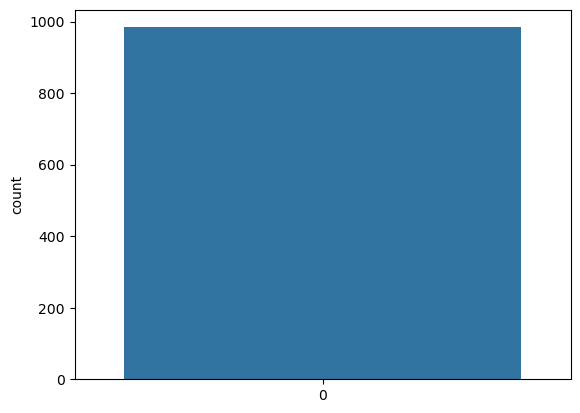

In [36]:
sns.countplot(y_edited_undersampled)
plt.show()

## OverSampling
 I use two techniques
  - Adasyn and RandomOverSampler

RandomOverSampler is over-sampling by duplicating some of the original samples of the minority class, SMOTE and ADASYN generate new samples in by interpolation.

In [37]:
 from imblearn.over_sampling import BorderlineSMOTE,ADASYN,KMeansSMOTE,SMOTE,RandomOverSampler,SVMSMOTE

RandomOverSampler

In [38]:
ros = RandomOverSampler(random_state=0)
X__random_oversampled, y_random_oversampled = ros.fit_resample(X, y)
X__random_oversampled.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.587299
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.795094
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,2.153063
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.163777
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.296140


In [39]:
print(len(X__random_oversampled))
print(len(y_random_oversampled))

568630
568630


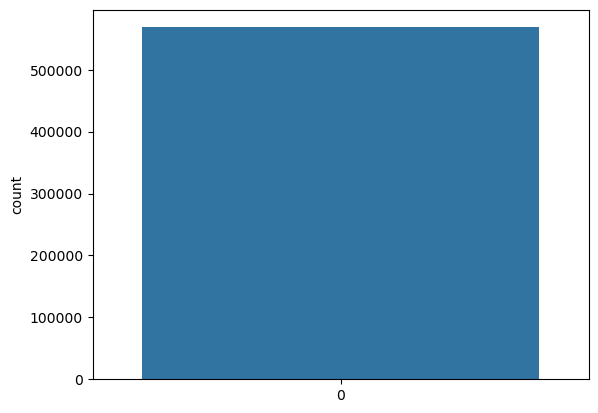

In [40]:
sns.countplot(y_random_oversampled)
plt.show()

Adasyn Oversampler


In [41]:
X_adasyn_oversampled, y_adasyn_oversampled = ADASYN().fit_resample(X, y)
X_adasyn_oversampled.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.587299
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.795094
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,2.153063
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.163777
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.296140


In [42]:
print(len(X_adasyn_oversampled))
print(len(y_adasyn_oversampled)) 

568676
568676


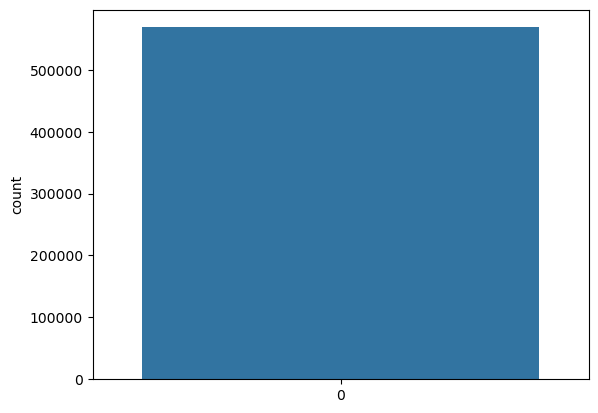

In [43]:
sns.countplot(y_adasyn_oversampled)
plt.show()

SMOTE
- the Synthetic Minority Oversampling Technique (SMOTE)

In [44]:
X_smote_oversampled, y_smote_oversampled = SMOTE().fit_resample(X, y)
X_smote_oversampled.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.587299
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.795094
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.611875,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,2.153063
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.163777
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.296140


In [45]:
print(len(X_smote_oversampled))
print(len(y_smote_oversampled))

568630
568630


Split all the datasets into train and test:

In [46]:
from sklearn.model_selection import train_test_split
#Original
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

#Undersampling
X_train_ru, X_test_ru, y_train_ru, y_test_ru = train_test_split(X_random_undersampled, y_random_undersampled, random_state= 42)
X_train_eu, X_test_eu, y_train_eu, y_test_eu = train_test_split(X_edited_undersampled, y_edited_undersampled, random_state= 42)

#Oversampling
X_train_ro, X_test_ro, y_train_ro, y_test_ro = train_test_split(X__random_oversampled, y_random_oversampled, random_state= 42)
X_train_ao, X_test_ao, y_train_ao, y_test_ao = train_test_split(X_adasyn_oversampled, y_adasyn_oversampled, random_state= 42)

X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(X_smote_oversampled, y_smote_oversampled, random_state= 42)

Following dictionary is used for automating training:


In [47]:
datasets_aug= {"original": [X_train, X_test, y_train, y_test],
           "Random Undersampling": [X_train_ru, X_test_ru, y_train_ru, y_test_ru],
           "Edited Undersampling":[X_train_eu, X_test_eu, y_train_eu, y_test_eu],
           "Random Oversampling": [X_train_ro, X_test_ro, y_train_ro, y_test_ro],
           "Adasyn Oversampling": [X_train_ao, X_test_ao, y_train_ao, y_test_ao],
           "Smote Oversampling": [X_train_so, X_test_so, y_train_so, y_test_so]}

# Model training
- I will test with RandomForest and a simple NN
- Comparison of the Original, Undersampled, and Oversampled datasets
- Later hyperparameter tuning will be performed in both for the best scoring dataset.


In [48]:
def conf_matrix(confusion_matrix):
    plt.figure(figsize=(10,10))
    f, ax= plt.subplots()
    labels= y_test.unique()
    sns.heatmap(confusion_matrix, cmap="Blues", annot = True, xticklabels=labels, yticklabels=labels);
    plt.xlabel("Predicted", fontsize=20)
    plt.ylabel("Actual", fontsize=20)
    plt.show()

In [49]:
def plot_training_history(history, name):
  hist=history.history
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Accuracy")
  plt.title(name)
  plt.plot(history.epoch, hist["accuracy"], label="Train Acuraccy")  
  plt.plot(history.epoch, hist["val_accuracy"], label="Val Acuraccy")
  plt.legend(["Training", "Validation"], loc="best")


In [50]:
def training_ml(model, name, dataset):
  model.fit(dataset[0], dataset[2])
  y_pred=model.predict(dataset[1])
  accuracy= accuracy_score(dataset[3],y_pred)
  matrix= confusion_matrix(dataset[3],y_pred)
  print(f"The model name is: {name}. It's accuracy is: {accuracy} \n")
  conf_matrix(matrix)
  return accuracy
  

Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
rfc= RandomForestClassifier()

The model name is: original. It's accuracy is: 0.9995646189713772 



<Figure size 1000x1000 with 0 Axes>

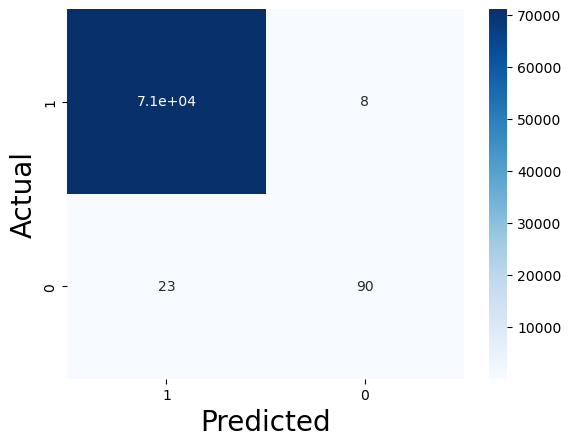

The model name is: Random Undersampling. It's accuracy is: 0.926829268292683 



<Figure size 1000x1000 with 0 Axes>

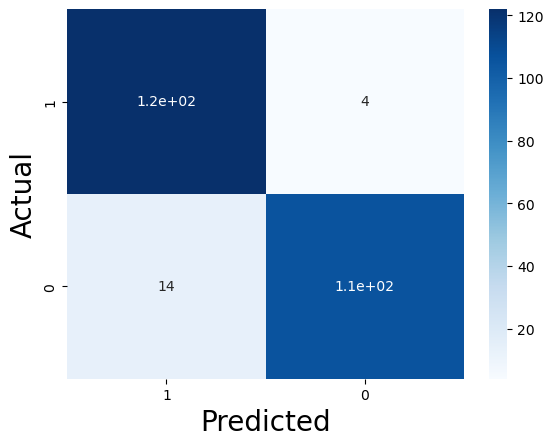

The model name is: Edited Undersampling. It's accuracy is: 0.9146341463414634 



<Figure size 1000x1000 with 0 Axes>

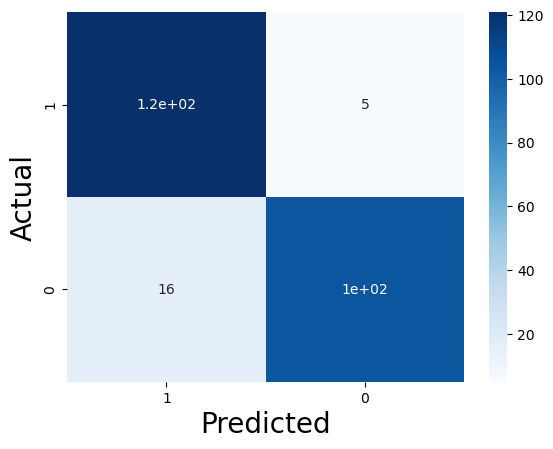

The model name is: Random Oversampling. It's accuracy is: 0.9999366901616511 



<Figure size 1000x1000 with 0 Axes>

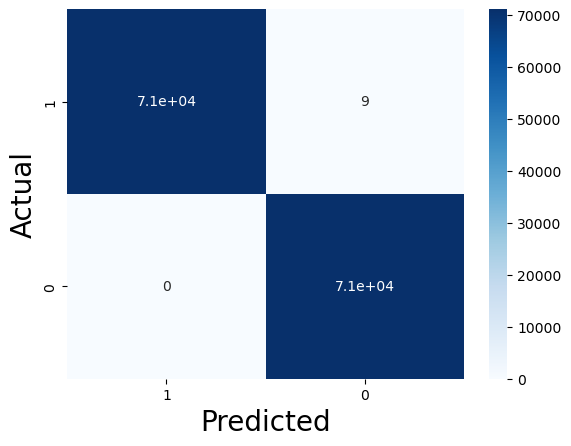

The model name is: Adasyn Oversampling. It's accuracy is: 0.9998944917668409 



<Figure size 1000x1000 with 0 Axes>

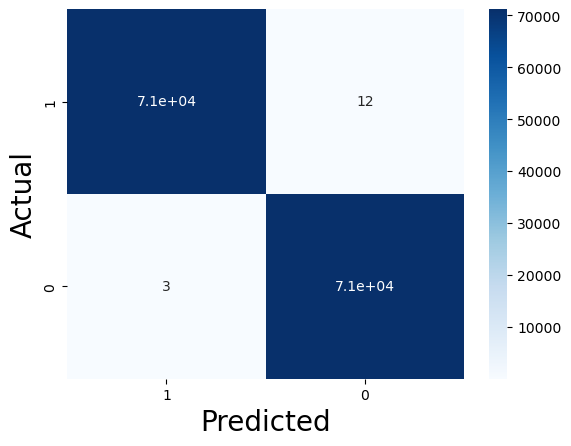

The model name is: Smote Oversampling. It's accuracy is: 0.9998804147497854 



<Figure size 1000x1000 with 0 Axes>

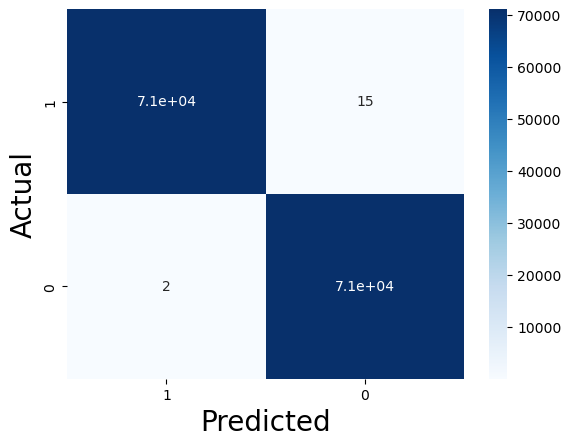

In [53]:
dic_results= {}
for k,v in datasets_aug.items():
  acc= training_ml(rfc, k,v)
  dic_results[k] = acc
  

In [54]:
dic_results

{'original': 0.9995646189713772,
 'Random Undersampling': 0.926829268292683,
 'Edited Undersampling': 0.9146341463414634,
 'Random Oversampling': 0.9999366901616511,
 'Adasyn Oversampling': 0.9998944917668409,
 'Smote Oversampling': 0.9998804147497854}

In [55]:
df_ml= pd.DataFrame(list(dic_results.items()), columns=["Model", "Accuracy"])

In [56]:
df_ml

,Model,Accuracy
0,original,0.999565
1,Random Undersampling,0.926829
2,Edited Undersampling,0.914634
3,Random Oversampling,0.999937
4,Adasyn Oversampling,0.999894
5,Smote Oversampling,0.999880


Neural Network


In [57]:
import tensorflow as tf
from tensorflow.keras import datasets, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, InputLayer, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, RandomFlip, RandomRotation, RandomZoom, InputLayer, Rescaling, Resizing, GlobalAveragePooling2D 
import tensorflow_datasets as tfds
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.utils import plot_model


In [58]:
import tensorflow as tf

# define the input shape
input_shape = (X_train.shape[1],)

# define the sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [59]:
# define early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

def train_nn(model, name, dataset):
  train_history= model.fit(
    dataset[0],
    dataset[2],
    epochs=20,
    verbose=2,
    validation_split=0.1,
    callbacks=[early_stop]
  )
  score= model.evaluate(dataset[1], dataset[3], verbose=2)
  print(f"\n Model: {name} \n")
  print("Test Accuracy: {:0.2f} \n".format(score[1]*100))
  plot_training_history(train_history, name)
  return score



Epoch 1/20
6008/6008 - 17s - loss: 0.0243 - accuracy: 0.9949 - val_loss: 0.0032 - val_accuracy: 0.9993 - 17s/epoch - 3ms/step
Epoch 2/20
6008/6008 - 16s - loss: 0.0073 - accuracy: 0.9989 - val_loss: 0.0030 - val_accuracy: 0.9994 - 16s/epoch - 3ms/step
Epoch 3/20
6008/6008 - 14s - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0022 - val_accuracy: 0.9995 - 14s/epoch - 2ms/step
Epoch 4/20
6008/6008 - 15s - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0025 - val_accuracy: 0.9994 - 15s/epoch - 3ms/step
Epoch 5/20
6008/6008 - 16s - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0022 - val_accuracy: 0.9995 - 16s/epoch - 3ms/step
Epoch 6/20
6008/6008 - 16s - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0020 - val_accuracy: 0.9996 - 16s/epoch - 3ms/step
Epoch 7/20
6008/6008 - 15s - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9995 - 15s/epoch - 3ms/step
Epoch 8/20
6008/6008 - 16s - loss: 0.0045 - accuracy: 0.9991 - val_loss: 0.0023 - val_accuracy: 0.9995 - 16s/epoch - 3

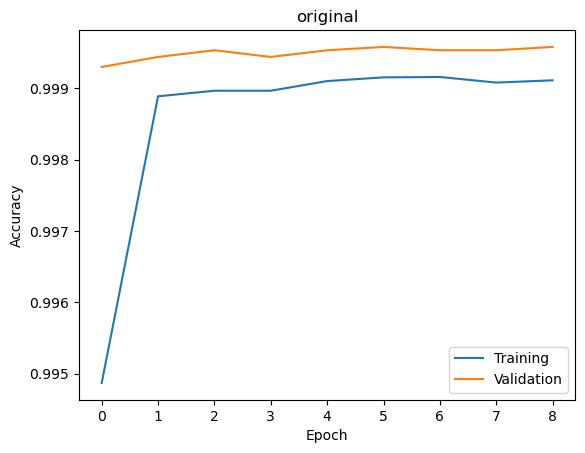

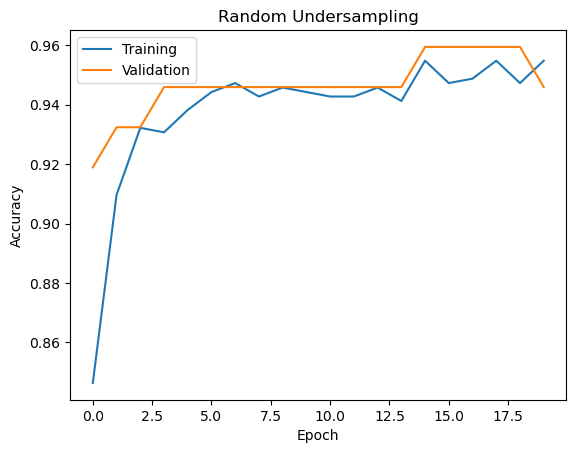

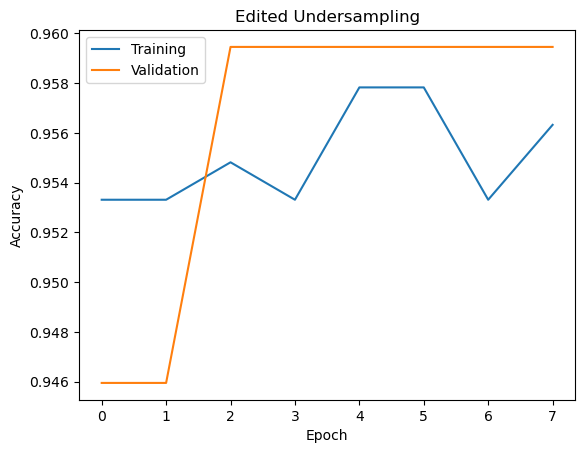

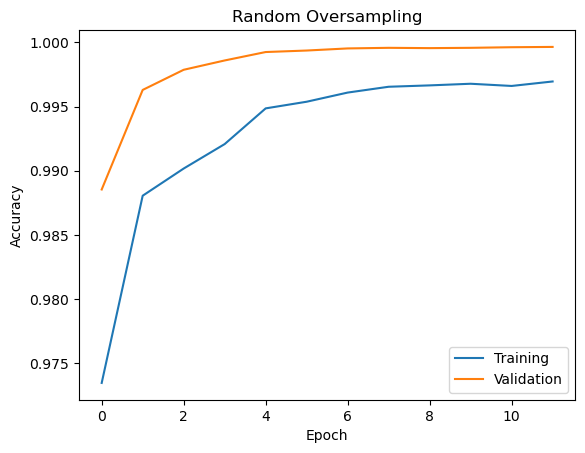

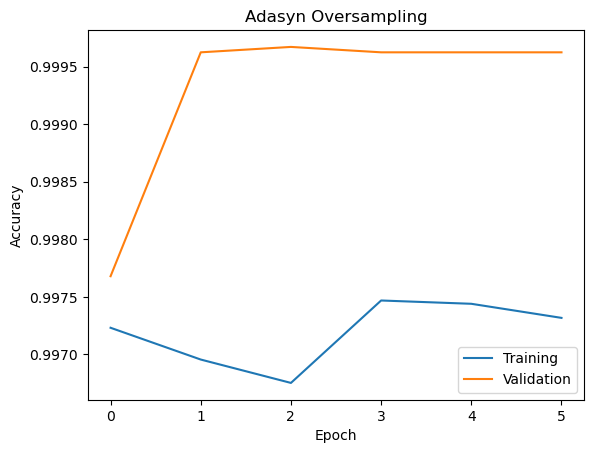

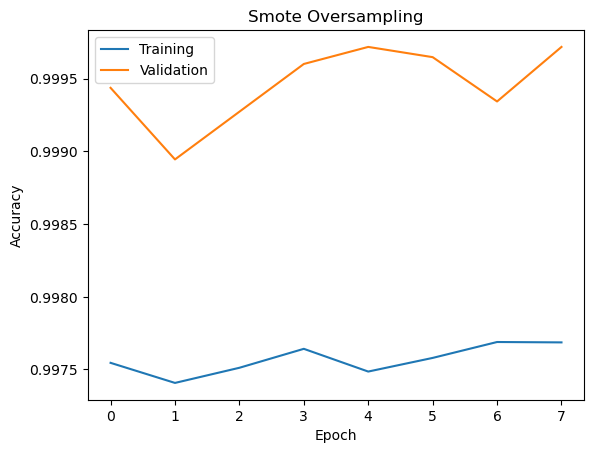

In [60]:
dic_results_nn= {}
for k,v in datasets_aug.items():
  acc = train_nn(model, k,v)
  dic_results_nn[k] = acc[1]


In [61]:
dic_results_nn

{'original': 0.9993820190429688,
 'Random Undersampling': 0.9390243887901306,
 'Edited Undersampling': 0.9390243887901306,
 'Random Oversampling': 0.9995638728141785,
 'Adasyn Oversampling': 0.9996764659881592,
 'Smote Oversampling': 0.9996482729911804}

In [62]:
df_nn= pd.DataFrame(list(dic_results.items()), columns=["Model", "Accuracy"])
df_nn

,Model,Accuracy
0,original,0.999565
1,Random Undersampling,0.926829
2,Edited Undersampling,0.914634
3,Random Oversampling,0.999937
4,Adasyn Oversampling,0.999894
5,Smote Oversampling,0.999880


# Best performing models:

Random Forest: Random Undersampling.
Oversampling seems to create near 100% accuracy but also overfitting. Same as the original dataset.

Neural Network: Random Undersampling
Same as with the Random forest classifier, the use of oversampling obtained 99.8 and above accuracy. It might be a clear case of overfitting. Therefore, choosing the best next option.

For both the best option is the dataset processed with Random Undersampling. This will be the dataset used for futher hyperparameter tuning. 

# Hyperparameter Tuning

In [63]:
params_rf={
    "criterion": ("gini", "entropy"),
    "min_samples_leaf": list(range(1,10)),
    "max_depth": list(range(1,10))
    }


In [64]:
from sklearn.model_selection import GridSearchCV

gs= GridSearchCV(rfc, params_rf, scoring= "accuracy", n_jobs=-1, cv=3, verbose=1)
gs.fit(X_train_ru, y_train_ru)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=1)

In [65]:
gs.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9)

In [66]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 1}

The model name is: Random UnderSampling. It's accuracy is: 0.9227642276422764 



<Figure size 1000x1000 with 0 Axes>

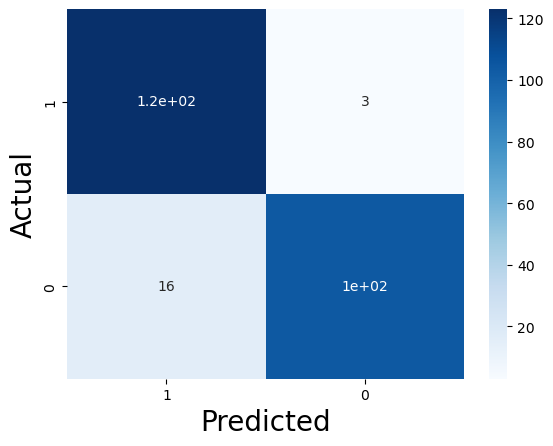

In [67]:
rfc_new= RandomForestClassifier(criterion = 'gini', max_depth= 6, min_samples_leaf = 2)

model= training_ml(rfc_new, "Random UnderSampling",datasets_aug["Random Undersampling"])

In [68]:
import pickle

with open("rf_creditcard_fraud.pkl", "wb") as f:
    pickle.dump(model, f)
#Load:

#with open("model.pkl", "rb") as f:
#    model = pickle.load(f)

Neural Network:

In [69]:
params_nn={
    "epochs": list(range(10,30)),
    'activation': ['relu', 'tanh'],
    "optimizer": ["adam", "SDG"],
}

In [70]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# Define the neural network architecture
def create_model(optimizer='sgd', activation='relu'):
    # define the input shape
    input_shape = (X_train.shape[1],)

    # define the sequential model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=64, activation= activation, input_shape=input_shape),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=32, activation=activation),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=16, activation=activation),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # compile the model
    model.compile(optimizer= optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model



# Define the hyperparameter grid
params_nn={
    "epochs": list(range(10,30)),
    'activation': ['relu', 'tanh'],
    "optimizer": ["adam", "sgd", "AdamW"] }

# Create a Keras classifier
keras_clf = KerasClassifier(build_fn=create_model, epochs=20, batch_size=32, verbose=0)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=keras_clf, param_grid=params_nn, cv=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(datasets_aug["Random Undersampling"][0], datasets_aug["Random Undersampling"][2])

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/keras/wrap

Best parameters:  {'activation': 'relu', 'epochs': 23, 'optimizer': 'adam'}
Best score:  0.9403794010480245


In [71]:
input_shape = (X_train.shape[1],)

    # define the sequential model
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=64, activation= "tanh", input_shape=input_shape),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=32, activation="tanh"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=16, activation="tanh"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # compile the model
model.compile(optimizer= "adam",
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

Epoch 1/26
21/21 - 1s - loss: 0.7252 - accuracy: 0.5708 - val_loss: 0.4754 - val_accuracy: 0.8378 - 1s/epoch - 67ms/step
Epoch 2/26
21/21 - 0s - loss: 0.5679 - accuracy: 0.7184 - val_loss: 0.3834 - val_accuracy: 0.8784 - 91ms/epoch - 4ms/step
Epoch 3/26
21/21 - 0s - loss: 0.4760 - accuracy: 0.7696 - val_loss: 0.3191 - val_accuracy: 0.9054 - 91ms/epoch - 4ms/step
Epoch 4/26
21/21 - 0s - loss: 0.4559 - accuracy: 0.7967 - val_loss: 0.2627 - val_accuracy: 0.9189 - 106ms/epoch - 5ms/step
Epoch 5/26
21/21 - 0s - loss: 0.4047 - accuracy: 0.8328 - val_loss: 0.2200 - val_accuracy: 0.9459 - 95ms/epoch - 5ms/step
Epoch 6/26
21/21 - 0s - loss: 0.3251 - accuracy: 0.8645 - val_loss: 0.1929 - val_accuracy: 0.9459 - 95ms/epoch - 5ms/step
Epoch 7/26
21/21 - 0s - loss: 0.3157 - accuracy: 0.8675 - val_loss: 0.1684 - val_accuracy: 0.9459 - 103ms/epoch - 5ms/step
Epoch 8/26
21/21 - 0s - loss: 0.2807 - accuracy: 0.8991 - val_loss: 0.1524 - val_accuracy: 0.9459 - 118ms/epoch - 6ms/step
Epoch 9/26
21/21 - 0s 

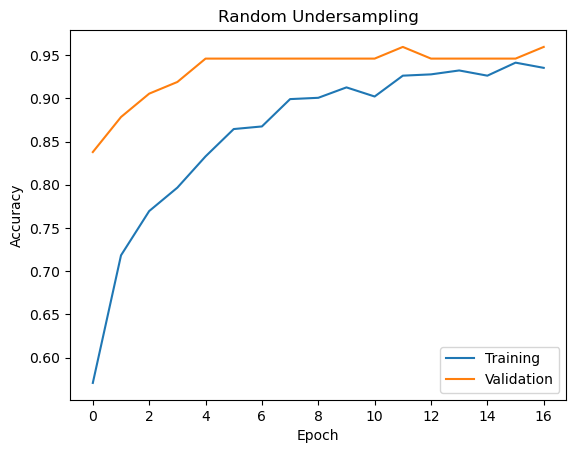

In [72]:
train_history= model.fit(
datasets_aug["Random Undersampling"][0],
datasets_aug["Random Undersampling"][2],
epochs=26,
verbose=2,
validation_split=0.1,
callbacks=[early_stop]
)
score= model.evaluate(datasets_aug["Random Undersampling"][1], datasets_aug["Random Undersampling"][3], verbose=2)
print(f"\n Model: Random Undersampling \n")
print("Test Accuracy: {:0.2f} \n".format(score[1]*100))
plot_training_history(train_history, "Random Undersampling")

In [73]:
model.save_weights('nn_credit_card_fraud_weights')
model.save('nn_credit_card_fraud.h5')